Import neccessary modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Import and inspect the adult income dataset

In [2]:
# load the dataset
income = pd.read_csv('adult.csv')

In [3]:
# inspect data
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# inspect data
income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# inspect the income column
income.income.value_counts()


<=50K    37155
>50K     11687
Name: income, dtype: int64

Plot and observe incomes

Text(0.5, 0, 'income')

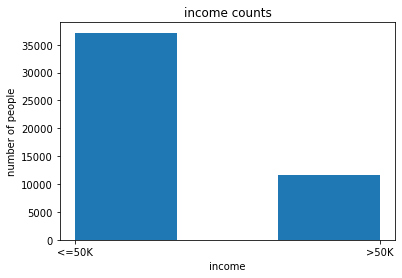

In [6]:
# plot the income column
plt.hist(income['income'], bins=3)
plt.title('income counts')
plt.ylabel('number of people')
plt.xlabel('income')

In [7]:
# inspect the percentages
income['income'].value_counts('normalize')

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

From the histogram and the normalized value counts, we can see that roughly 3/4 of the people make under 50k a year, while only 1/4 of the people make more than 50k a year.

Do people who work more hours make more income? Next we explore the relationship between number of hours worked per week versus income

In [8]:
# inspect the hours per week distribution
income['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

Text(0.5, 0, 'number of hours')

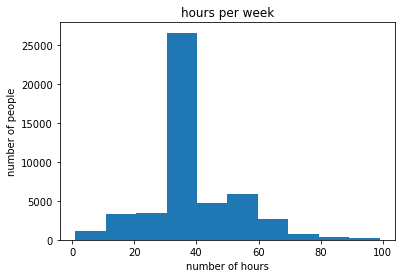

In [9]:
# plot the hours per week distribution
plt.hist(income['hours-per-week'])
plt.title('hours per week')
plt.ylabel('number of people')
plt.xlabel('number of hours')

From above plot we can see that majority of people work 40 hours a week, while some work less and some work more, there are few people who work upwards of 100 hours a week!

Text(0.5, 0, 'hours per week')

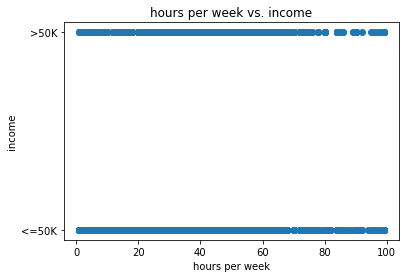

In [10]:
# attempt the plot hours per week vs. income distribution
plt.scatter(income['hours-per-week'], income['income'])
plt.title('hours per week vs. income')
plt.ylabel('income')
plt.xlabel('hours per week')

The above scatter plot isn't clear on the relationship between hours worked per week and income. We need to modify the original data a bit to create a stacked bar graph for easier visualization. 

Before making the graph, we need to first make the number of hours worked into bins, and then make a new dataframe grouped by number of hours worked, lastly make a pivot table showing the percentage of income above or below 50K at each number of hours worked group.

In [11]:
# define function to group hours per week
def hours_group(row):
    if row['hours-per-week'] < 40:
        return '40-'
    elif row['hours-per-week'] == 40:
        return '40'
    elif row['hours-per-week'] > 40:
        return '40+'

In [12]:
# create column for grouped hours per week
income['hours_group'] = income.apply(lambda row: hours_group(row), axis=1)
income[['hours_group', 'income']]

,hours_group,income
0,40,<=50K
1,40+,<=50K
2,40,>50K
3,40,>50K
4,40-,<=50K
...,...,...
48837,40-,<=50K
48838,40,>50K
48839,40,<=50K
48840,40-,<=50K


In [13]:
# group the hours per week column and inspect the income distribution
hours_income = pd.DataFrame(income.groupby('hours_group')['income'].value_counts())
hours_income.rename(columns={'income':'counts'}, inplace=True)
hours_income.reset_index(inplace=True)
hours_income

,hours_group,income,counts
0,40,<=50K,17953
1,40,>50K,4850
2,40+,<=50K,8610
3,40+,>50K,5742
4,40-,<=50K,10592
5,40-,>50K,1095


In [14]:
# same table but with percentages instead of counts
hours_income_pct = pd.DataFrame(income.groupby('hours_group')['income'].value_counts('normalize'))
hours_income_pct.rename(columns={'income':'pct'}, inplace=True)
hours_income_pct.reset_index(inplace=True)
hours_income_pct

,hours_group,income,pct
0,40,<=50K,0.787309
1,40,>50K,0.212691
2,40+,<=50K,0.599916
3,40+,>50K,0.400084
4,40-,<=50K,0.906306
5,40-,>50K,0.093694


In [15]:
# create pivot table for plot
income_pct = pd.pivot_table(hours_income_pct, values='pct', index=['hours_group'], columns=['income'])
income_pct.reset_index(inplace=True)
income_pct

income,hours_group,<=50K,>50K
0,40,0.787309,0.212691
1,40+,0.599916,0.400084
2,40-,0.906306,0.093694


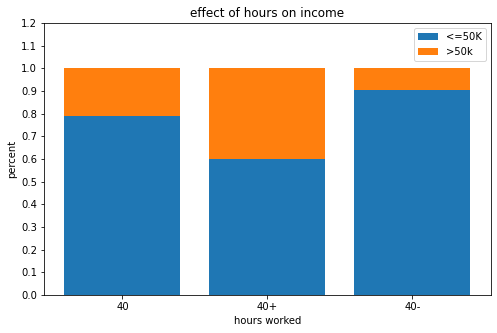

In [16]:
# plot the percentages of income groups grouped by hours per week groups
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(income_pct['hours_group'], income_pct['<=50K'], label='<=50K')
ax.bar(income_pct['hours_group'], income_pct['>50K'], bottom=income_pct['<=50K'], label='>50k')
ax.set_title('effect of hours on income')
ax.set_xlabel('hours worked')
ax.set_ylabel('percent')
ax.set_yticks(np.arange(0, 1.3, 0.1))
ax.legend()

From above stacked bar graph, we can clearly see that the more hours a person works, the more likely he or she will make over 50K a year.

We can use similar methods to visualize the effect of other factors on income. Next we can explore the effect of age.

Text(0, 0.5, 'count')

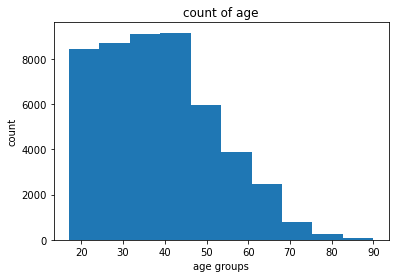

In [17]:
# plot age distribution
plt.hist(income['age'])
plt.title('count of age')
plt.xlabel('age groups')
plt.ylabel('count')

From the above histogram we can see the distribution of ages of workers. Amazingly, some people are still working at the age of 80-90!

In [18]:
# make a counter column
income['income_counter'] = 1

In [19]:
# pivot table for age and income, fill all the NaNs with 0s
age_income = pd.pivot_table(income, values='income_counter', index=['age'], columns=['income'], aggfunc='count').fillna(0).reset_index()
age_income

income,age,<=50K,>50K
0,17,595.0,0.0
1,18,862.0,0.0
2,19,1050.0,3.0
3,20,1112.0,1.0
4,21,1090.0,6.0
...,...,...,...
69,86,1.0,0.0
70,87,3.0,0.0
71,88,5.0,1.0
72,89,2.0,0.0


In [20]:
# assign bins
bins = pd.cut(age_income['age'], [10, 20, 30, 40, 50, 60, 70, 80, 90])
bins

0     (10, 20]
1     (10, 20]
2     (10, 20]
3     (10, 20]
4     (20, 30]
        ...   
69    (80, 90]
70    (80, 90]
71    (80, 90]
72    (80, 90]
73    (80, 90]
Name: age, Length: 74, dtype: category
Categories (8, interval[int64]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

In [21]:
# group by bins
age_income_group = age_income.groupby(bins)['<=50K', '>50K'].sum()
age_income_group['age_group'] = ['teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s']
age_income_group

C:\Users\Yanming\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


income,<=50K,>50K,age_group
age,,,
"(10, 20]",3619.0,4.0,teens
"(20, 30]",11181.0,989.0,20s
"(30, 40]",9230.0,3608.0,30s
"(40, 50]",6438.0,3965.0,40s
"(50, 60]",3932.0,2270.0,50s
"(60, 70]",2038.0,700.0,60s
"(70, 80]",594.0,126.0,70s
"(80, 90]",123.0,25.0,80s


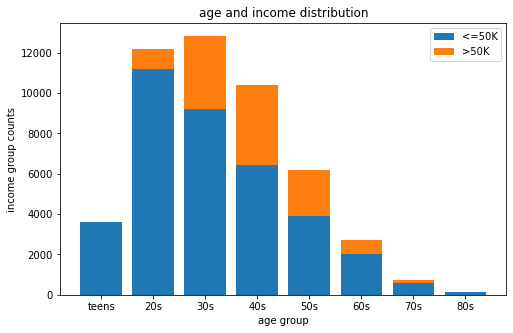

In [22]:
# construct bar graph
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(age_income_group['age_group'], age_income_group['<=50K'], label='<=50K')
ax.bar(age_income_group['age_group'], age_income_group['>50K'], bottom=age_income_group['<=50K'], label='>50K')
ax.set_title('age and income distribution')
ax.set_xlabel('age group')
ax.set_ylabel('income group counts')
ax.legend()

We see from the above histogram that income above 50K percentage seems to increase until peak at the age group of 40s, then drops back down. I will construct a percentage bar graph to show this more clearly.

In [23]:
# make a new table listing all the percentages
high_inc = age_income_group['>50K']
low_inc = age_income_group['<=50K']
total_count = age_income_group['>50K']+age_income_group['<=50K']
age_group = age_income_group['age_group']
high_inc_pct = high_inc/total_count
low_inc_pct = low_inc/total_count
age_inc_pct = pd.DataFrame([age_group, low_inc_pct, high_inc_pct]).T
age_inc_pct.columns = ['age_group', '<=50K', '>50K']
age_inc_pct

,age_group,<=50K,>50K
age,,,
"(10, 20]",teens,0.998896,0.00110406
"(20, 30]",20s,0.918735,0.0812654
"(30, 40]",30s,0.718959,0.281041
"(40, 50]",40s,0.61886,0.38114
"(50, 60]",50s,0.633989,0.366011
"(60, 70]",60s,0.744339,0.255661
"(70, 80]",70s,0.825,0.175
"(80, 90]",80s,0.831081,0.168919


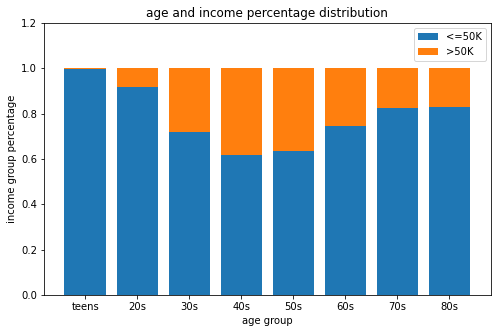

In [24]:
# construct bar graph
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(age_inc_pct['age_group'], age_inc_pct['<=50K'], label='<=50K')
ax.bar(age_inc_pct['age_group'], age_inc_pct['>50K'], bottom=age_inc_pct['<=50K'], label='>50K')
ax.set_title('age and income percentage distribution')
ax.set_xlabel('age group')
ax.set_ylabel('income group percentage')
ax.set_yticks(np.arange(0, 1.4, 0.2))
ax.legend()

The above bar graph confirmed the previous observation.

Next we explore the effect of number of years of education

In [25]:
# inspect education level
income['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [26]:
# define function for grouping education level
def edu_grouper(name):
    if name in ['11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']:
        return '12- years'
    elif name in ['HS-grad']:
        return '12 years'
    elif name in ['Some-college', 'Bachelors', 'Assoc-voc', 'Assoc-acdm']:
        return '12-16 years'
    elif name in ['Masters', 'Prof-school', 'Doctorate']:
        return '16+ years'
    

In [27]:
# create new column for education grouping
income['edu_group'] = income['education'].apply(edu_grouper)

Text(0, 0.5, 'counts')

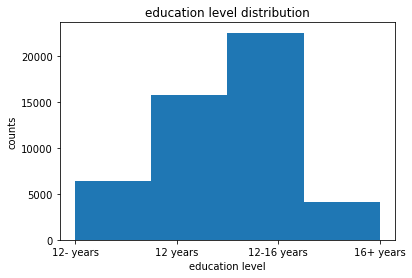

In [28]:
# plot education level distribution
plt.hist(income['edu_group'], bins=4)
plt.title('education level distribution')
plt.xlabel('education level')
plt.ylabel('counts')

In [29]:
# make pivot table of education group and income levels
edu_inc = pd.pivot_table(income, values='income_counter', index='edu_group', columns='income', aggfunc='sum').reset_index()
edu_inc

income,edu_group,<=50K,>50K
0,12 years,13281,2503
1,12- years,6042,366
2,12-16 years,16254,6311
3,16+ years,1578,2507


In [30]:
# transform into percentages
edu_group = edu_inc['edu_group']
low_inc = edu_inc['<=50K']
high_inc = edu_inc['>50K']
low_inc_pct = low_inc/(low_inc+high_inc)
high_inc_pct = high_inc/(low_inc+high_inc)
edu_inc_pct = pd.DataFrame([edu_group, low_inc_pct, high_inc_pct]).T
edu_inc_pct.columns = ['edu_group', '<=50K', '>50K']
edu_inc_pct

,edu_group,<=50K,>50K
0,12 years,0.841422,0.158578
1,12- years,0.942884,0.0571161
2,12-16 years,0.720319,0.279681
3,16+ years,0.386291,0.613709


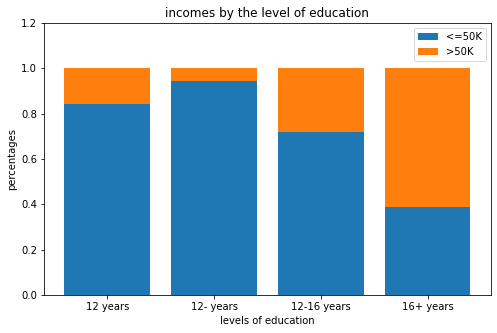

In [31]:
# plot the percentages
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(edu_inc_pct['edu_group'], edu_inc_pct['<=50K'], label='<=50K')
ax.bar(edu_inc_pct['edu_group'], edu_inc_pct['>50K'], bottom=edu_inc_pct['<=50K'], label='>50K')
ax.set_title('incomes by the level of education')
ax.set_xlabel('levels of education')
ax.set_ylabel('percentages')
ax.set_yticks(np.arange(0, 1.4, 0.2))
ax.legend()

From above bar graph, we see a clear positive correlation between levels of education and income. One thing to note is that people who did not finish high school had higher chance of making more than 50K than people who finished high school but didn't get further education, this may be a factor of work experiences gained from extra years of working.